## **White Wine Quality Analysis**

**Benedictus Bayu Pramudhito**



In [130]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
import os
print('\n'.join(os.listdir(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)')))

bottle.csv
References
Untitled0.ipynb
Week_1_Python_1.ipynb
heart.csv
iris.csv
pima-indians-diabetes.csv
sonar.csv
housing.csv
winequality-white.csv
auto.csv


In [132]:
df = pd.read_csv(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)/winequality-white.csv', delimiter=';')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [133]:
df.shape

(4898, 12)

In [134]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [135]:
#Cek missing values
print(df.isnull().sum())
print('\nTerdapat {} Missing Values pada Dataset'.format(df.isnull().sum().sum()))

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Terdapat 0 Missing Values pada Dataset


In [136]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [137]:
#Cek korelasi
df.corr()['quality'][:-1]

fixed_acidity          -0.113663
volatile_acidity       -0.194723
citric_acid            -0.009209
residual_sugar         -0.097577
chlorides              -0.209934
free_sulfur_dioxide     0.008158
total_sulfur_dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64

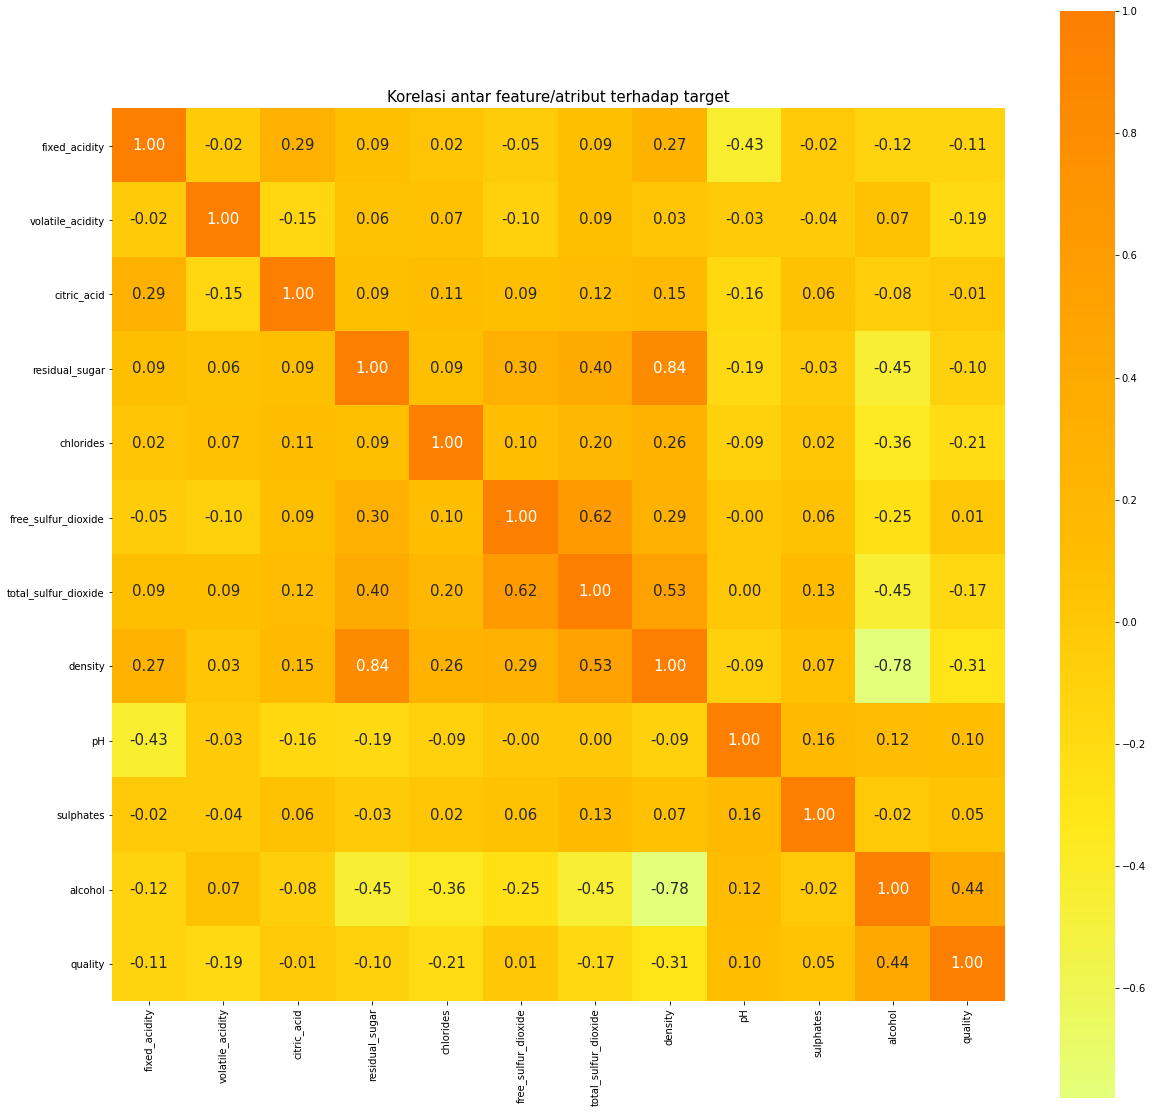

In [138]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Wistia')
plt.title('Korelasi antar feature/atribut terhadap target', fontsize=15)
plt.show()

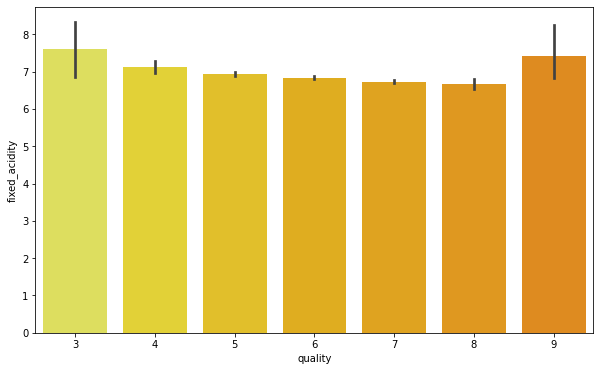

In [139]:
plt.figure(figsize=(10, 6))
sns.barplot(df['quality'], df['fixed_acidity'], palette='Wistia')
plt.show()

Kolom fixed acidity tidak memberikan informasi spesifik untuk mengklasifikasikan quality dari wine nya

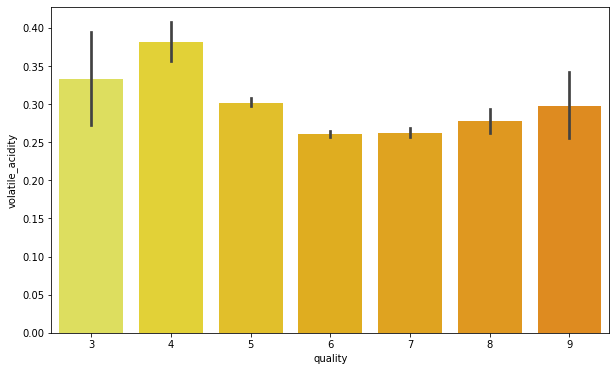

In [140]:
plt.figure(figsize=(10, 6))
sns.barplot(df['quality'], df['volatile_acidity'], palette='Wistia')
plt.show()

Kolom volatile acidity juga tidak memberikan informasi spesifik untuk mengklasifikasikan quality dari wine nya

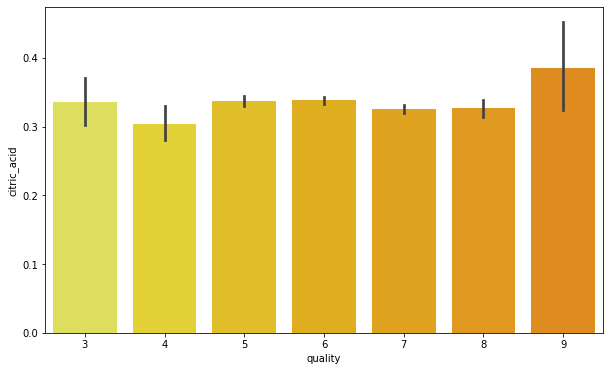

In [141]:
#Citric acid
fig = plt.figure(figsize=(10, 6))
sns.barplot(df['quality'], df['citric_acid'], palette='Wistia')
plt.show()

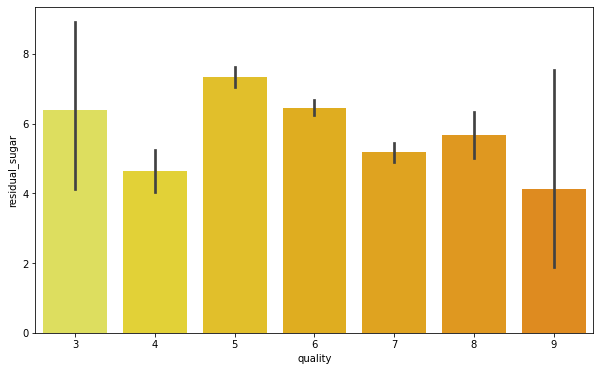

In [142]:
#Residual Sugar
fig = plt.figure(figsize=(10, 6))
sns.barplot(df['quality'], df['residual_sugar'], palette='Wistia')
plt.show()

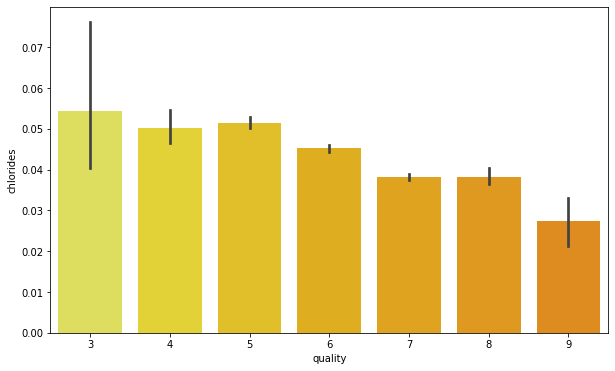

In [143]:
#chlorides
fig = plt.figure(figsize=(10, 6))
sns.barplot(df['quality'], df['chlorides'], palette='Wistia')
plt.show()

Semakin tinggi kualitas dari wine, semakin rendah kadar chlorides nya

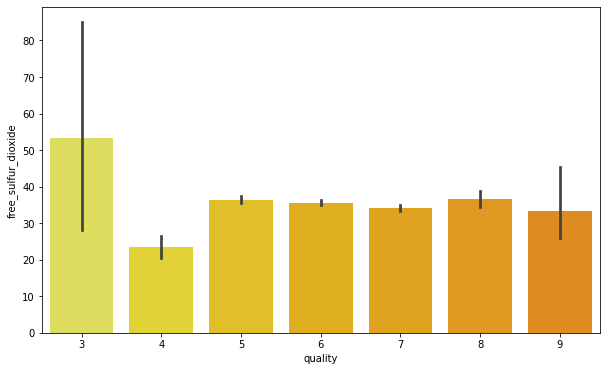

In [144]:
#free_sulfur_dioxide
fig = plt.figure(figsize=(10, 6))
sns.barplot(df['quality'], df['free_sulfur_dioxide'], palette='Wistia')
plt.show()

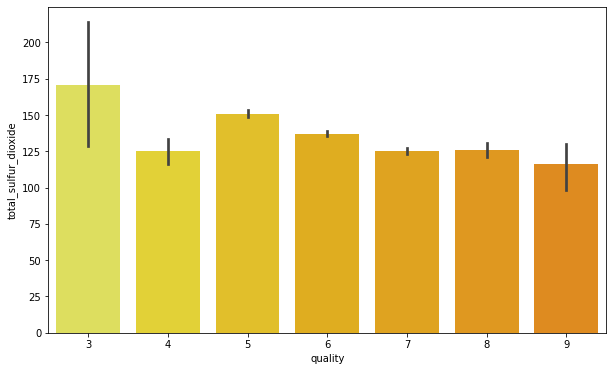

In [145]:
#total_sulfur_dioxide
fig = plt.figure(figsize=(10, 6))
sns.barplot(df['quality'], df['total_sulfur_dioxide'], palette='Wistia')
plt.show()

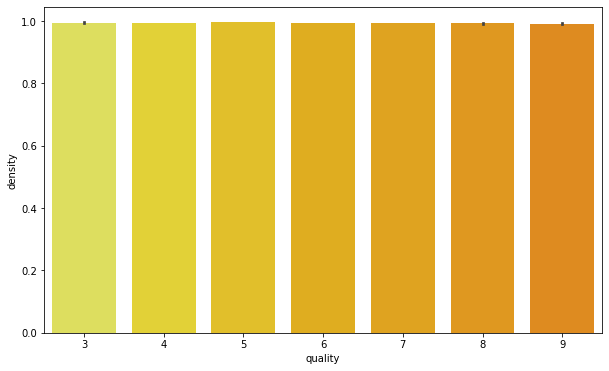

In [146]:
#density
fig = plt.figure(figsize=(10, 6))
sns.barplot(df['quality'], df['density'], palette='Wistia')
plt.show()

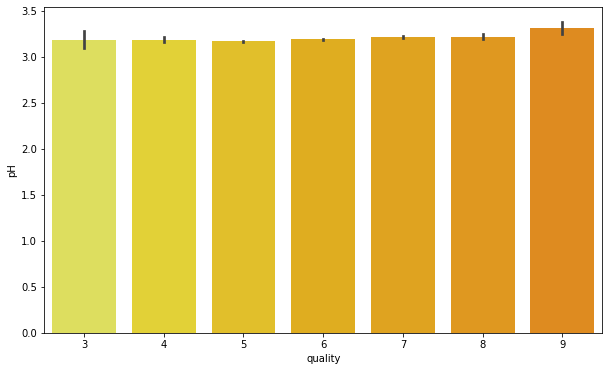

In [147]:
#pH
fig = plt.figure(figsize=(10, 6))
sns.barplot(df['quality'], df['pH'], palette='Wistia')
plt.show()

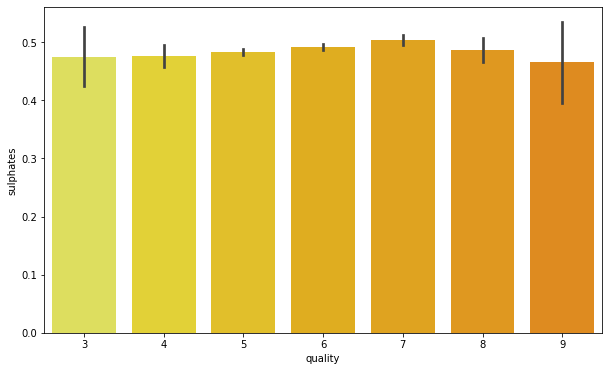

In [148]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(df['quality'], df['sulphates'], palette='Wistia')
plt.show()

In [149]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

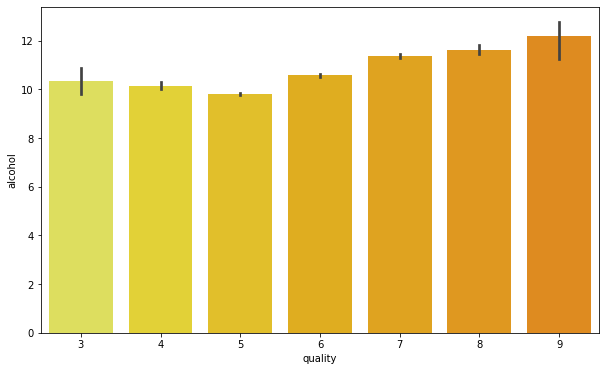

In [150]:
#alcohol
fig = plt.figure(figsize=(10, 6))
sns.barplot(df['quality'], df['alcohol'], palette='Wistia')
plt.show()

Makin tinggi kualitas dari wine, makin tinggi kadar alkoholnya

**Binning**

In [151]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [152]:
print(min(df['quality']), max(df['quality']))

3 9


In [153]:
bins = np.linspace(min(df['quality']), max(df['quality']), 3)
bins

array([3., 6., 9.])

In [154]:
qual_names = ['bad', 'good']
df['quality_categories'] = pd.cut(df['quality'], bins, labels=qual_names, include_lowest=True)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_categories
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,bad
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,bad
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,bad
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,bad
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,bad


**Encoding**

**Using Label Encoder**

In [155]:
from sklearn.preprocessing import LabelEncoder

In [156]:
label_encode = LabelEncoder()

In [157]:
df['quality_categories'] = label_encode.fit_transform(df['quality_categories'])

0    3838
1    1060
Name: quality_categories, dtype: int64 



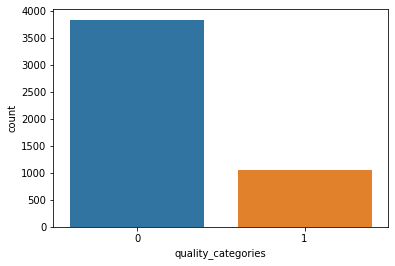

In [158]:
print(df['quality_categories'].value_counts(), '\n')
sns.countplot(df['quality_categories'])

In [159]:
df.shape

(4898, 13)

**Machine Learning Model**

**Data Preprocessing**

1. Lakukan preprocessing terhadap data menggunakan:
  - StandardScaler
  - Yeo-Johnson (PowerTransformer)
  - Box-Cox Transformation (PowerTransformer)
  - QuantileTransformer
  - MinMaxScaler
  - MaxAbsScaler
  - RobustScaler

  Dan jelaskan apabila hasil training untuk algoritma LinearRegression untuk masing-masing metode transformasi data dibandingkan!

  Jelaskan juga apabila terdapat metode preprocessing yang tidak dapat digunakan untuk salah satu dataset!

In [160]:
df.drop(['quality'], axis=1, inplace=True)

In [161]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_categories
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [162]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_categories
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.216415
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.411842
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,0.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,0.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [163]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler

In [164]:
stdr = StandardScaler()
powbox = PowerTransformer(method='yeo-johnson', standardize=True)
powbox1 = PowerTransformer(method='box-cox', standardize=True)
quan = QuantileTransformer()
minmax = MinMaxScaler()
maxabs = MaxAbsScaler()
rbst = RobustScaler()

In [165]:
X = df.drop(['quality_categories'], axis=1)
y = df['quality_categories']

In [166]:
X_stdr = stdr.fit_transform(X.values)
y_stdr = stdr.fit_transform(df['quality_categories'].values.reshape(-1,1)).flatten()

X_powbox = powbox.fit_transform(X.values)
y_powbox = powbox.fit_transform(df['quality_categories'].values.reshape(-1,1)).flatten()

#X_powbox1 = powbox1.fit_transform(X.values)
#y_powbox1 = powbox1.fit_transform(df['quality_categories'].values.reshape(-1, 1)).flatten()

X_quan = quan.fit_transform(X.values)
y_quan = quan.fit_transform(df['quality_categories'].values.reshape(-1,1)).flatten()

X_minmax = minmax.fit_transform(X.values)
y_minmax = minmax.fit_transform(df['quality_categories'].values.reshape(-1,1)).flatten()

X_maxabs = maxabs.fit_transform(X.values)
y_maxabs = maxabs.fit_transform(df['quality_categories'].values.reshape(-1,1)).flatten()

X_rbst = rbst.fit_transform(X.values)
y_rbst = rbst.fit_transform(df['quality_categories'].values.reshape(-1,1)).flatten()

**Using Standard Scaler**

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_stdr, y_stdr, test_size=0.25, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3673, 11), (1225, 11), (3673,), (1225,))

In [168]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [169]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
prediksi_linreg = linreg.predict(X_test)

In [170]:
mse = mean_squared_error(y_test, prediksi_linreg)
mae = mean_absolute_error(y_test, prediksi_linreg)
r2 = r2_score(y_test, prediksi_linreg)
print('MSE (Mean Squared Error) Using Standard Scaler is  :', mse)
print('MAE (Mean Absolute Error) Using Standard Scaler is :', mae)
print('r^2 score Using Standard Scaler is                 :', r2)
print('RMSE (Root Mean Squared Error) is                  :', np.sqrt(mean_squared_error(y_test, prediksi_linreg)))

MSE (Mean Squared Error) Using Standard Scaler is  : 0.8282282144860279
MAE (Mean Absolute Error) Using Standard Scaler is : 0.7015677877856494
r^2 score Using Standard Scaler is                 : 0.1953256124718693
RMSE (Root Mean Squared Error) is                  : 0.9100704447931643


**Using Power Transformer (yeo-johnson)**

In [171]:
X_train_yeo, X_test_yeo, y_train_yeo, y_test_yeo = train_test_split(X_powbox, y_powbox, test_size=0.25, random_state=10)
X_train_yeo.shape, X_test_yeo.shape, y_train_yeo.shape, y_test_yeo.shape

((3673, 11), (1225, 11), (3673,), (1225,))

In [172]:
linreg_yeo = LinearRegression()
linreg_yeo.fit(X_train_yeo, y_train_yeo)
prediksi_linreg_yeo = linreg_yeo.predict(X_test_yeo)

In [173]:
mse = mean_squared_error(y_test_yeo, prediksi_linreg_yeo)
mae = mean_absolute_error(y_test_yeo, prediksi_linreg_yeo)
r2 = r2_score(y_test_yeo, prediksi_linreg_yeo)
print('MSE (Mean Squared Error) Using Power Transformer is        :', mse)
print('MAE (Mean Absolute Error) Using Power Transformer is       :', mae)
print('r^2 score Using Power Transformer is                       :', r2)
print('RMSE (Root Mean Squared Error) Using Power Transformer is  :', np.sqrt(mean_squared_error(y_test_yeo, prediksi_linreg_yeo)))

MSE (Mean Squared Error) Using Power Transformer is        : 0.8334184366761399
MAE (Mean Absolute Error) Using Power Transformer is       : 0.7093971010098716
r^2 score Using Power Transformer is                       : 0.19028299403782456
RMSE (Root Mean Squared Error) Using Power Transformer is  : 0.9129175410058347


**Using Quantile Transformer**

In [174]:
X_train_quan, X_test_quan, y_train_quan, y_test_quan = train_test_split(X_quan, y_quan, test_size=0.25, random_state=10)
X_train_quan.shape, X_test_quan.shape, y_train_quan.shape, y_test_quan.shape

((3673, 11), (1225, 11), (3673,), (1225,))

In [175]:
linreg_quan = LinearRegression()
linreg_quan.fit(X_train_quan, y_train_quan)
prediksi_linreg_quan = linreg_quan.predict(X_test_quan)

In [176]:
mse = mean_squared_error(y_test_quan, prediksi_linreg_quan)
mae = mean_absolute_error(y_test_quan, prediksi_linreg_quan)
r2 = r2_score(y_test_quan, prediksi_linreg_quan)
print('MSE (Mean Squared Error) Using Quantile Transformer is        :', mse)
print('MAE (Mean Absolute Error) Using Quantile Transformer is       :', mae)
print('r^2 score Using Quantile Transformer is                       :', r2)
print('RMSE (Root Mean Squared Error) Using Quantile Transformer is  :', np.sqrt(mean_squared_error(y_test_quan, prediksi_linreg_quan)))

MSE (Mean Squared Error) Using Quantile Transformer is        : 0.14168251776851812
MAE (Mean Absolute Error) Using Quantile Transformer is       : 0.29123365964179665
r^2 score Using Quantile Transformer is                       : 0.18826709951595677
RMSE (Root Mean Squared Error) Using Quantile Transformer is  : 0.3764073827231848


**Using MinMax Scaler**

In [177]:
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_minmax, y_minmax, test_size=0.25, random_state=10)

In [178]:
linreg_minmax = LinearRegression()
linreg_minmax.fit(X_train_minmax, y_train_minmax)
prediksi_linreg_minmax = linreg_minmax.predict(X_test_minmax)

In [179]:
mse = mean_squared_error(y_test_minmax, prediksi_linreg_minmax)
mae = mean_absolute_error(y_test_minmax, prediksi_linreg_minmax)
r2 = r2_score(y_test_minmax, prediksi_linreg_minmax)
print('MSE (Mean Squared Error) Using MinMax Scaler is        :', mse)
print('MAE (Mean Absolute Error) Using MinMax Scaler is       :', mae)
print('r^2 score Using MinMax Scaler is                       :', r2)
print('RMSE (Root Mean Squared Error) Using MinMax Scaler is  :', np.sqrt(mean_squared_error(y_test_minmax, prediksi_linreg_minmax)))

MSE (Mean Squared Error) Using MinMax Scaler is        : 0.14045050181019128
MAE (Mean Absolute Error) Using MinMax Scaler is       : 0.2889058110942544
r^2 score Using MinMax Scaler is                       : 0.19532561247186864
RMSE (Root Mean Squared Error) Using MinMax Scaler is  : 0.3747672635252328


**Using MaxAbs Scaler**

In [180]:
X_train_maxabs, X_test_maxabs, y_train_maxabs, y_test_maxabs = train_test_split(X_maxabs, y_maxabs, test_size=0.25, random_state=10)
X_train_maxabs.shape, X_test_maxabs.shape, y_train_maxabs.shape, y_test_maxabs.shape

((3673, 11), (1225, 11), (3673,), (1225,))

In [181]:
linreg_maxabs = LinearRegression()
linreg_maxabs.fit(X_train_maxabs, y_train_maxabs)
prediksi_linreg_maxabs = linreg_maxabs.predict(X_test_maxabs)

In [182]:
mse = mean_squared_error(y_test_maxabs, prediksi_linreg_maxabs)
mae = mean_absolute_error(y_test_maxabs, prediksi_linreg_maxabs)
r2 = r2_score(y_test_maxabs, prediksi_linreg_maxabs)
print('MSE (Mean Squared Error) Using MaxAbs Scaler is        :', mse)
print('MAE (Mean Absolute Error) Using MaxAbs Scaler is       :', mae)
print('r^2 score Using MaxAbs Scaler is                       :', r2)
print('RMSE (Root Mean Squared Error) Using MaxAbs Scaler is  :', np.sqrt(mean_squared_error(y_test_maxabs, prediksi_linreg_maxabs)))

MSE (Mean Squared Error) Using MaxAbs Scaler is        : 0.14045050181019028
MAE (Mean Absolute Error) Using MaxAbs Scaler is       : 0.288905811094267
r^2 score Using MaxAbs Scaler is                       : 0.1953256124718743
RMSE (Root Mean Squared Error) Using MaxAbs Scaler is  : 0.37476726352523143


**Using Robust Scaler**

In [183]:
X_train_rbst, X_test_rbst, y_train_rbst, y_test_rbst = train_test_split(X_rbst, y_rbst, test_size=0.25, random_state=10)
X_train_rbst.shape, X_test_rbst.shape, y_train_rbst.shape, y_test_rbst.shape

((3673, 11), (1225, 11), (3673,), (1225,))

In [184]:
linreg_rbst = LinearRegression()
linreg_rbst.fit(X_train_rbst, y_train_rbst)
prediksi_linreg_rbst = linreg_rbst.predict(X_test_rbst)

In [185]:
mse = mean_squared_error(y_test_rbst, prediksi_linreg_rbst)
mae = mean_absolute_error(y_test_rbst, prediksi_linreg_rbst)
r2 = r2_score(y_test_rbst, prediksi_linreg_rbst)
print('MSE (Mean Squared Error) Using MaxAbs Scaler is        :', mse)
print('MAE (Mean Absolute Error) Using MaxAbs Scaler is       :', mae)
print('r^2 score Using MaxAbs Scaler is                       :', r2)
print('RMSE (Root Mean Squared Error) Using MaxAbs Scaler is  :', np.sqrt(mean_squared_error(y_test_rbst, prediksi_linreg_rbst)))

MSE (Mean Squared Error) Using MaxAbs Scaler is        : 0.14045050181019114
MAE (Mean Absolute Error) Using MaxAbs Scaler is       : 0.2889058110942554
r^2 score Using MaxAbs Scaler is                       : 0.1953256124718693
RMSE (Root Mean Squared Error) Using MaxAbs Scaler is  : 0.3747672635252326


2. Gunakan algoritma berikut dan lakukan percobaan hyperparameter tuning untuk mendapatkan hasil terbaik:
  - Random Forest Regressor
  - XGBoost
  - SVM Regressor
  - KNN Regressor

  Hitung angka r^2 serta RMSE untuk menentukan mana algoritma yang paling baik!

Akan digunakan Robust Scaler

**Support Vector Regressor**

In [186]:
from sklearn.svm import SVR

In [187]:
types = ['rbf', 'poly', 'linear']
for i in types:
  svr = SVR(kernel=i)
  svr.fit(X_train_rbst, y_train_rbst)
  prediksi_svr = svr.predict(X_train_rbst)
  prediksi_svr_test = svr.predict(X_test_rbst)
  r2 = r2_score(y_test_rbst, prediksi_svr_test)
  print('r^2 score Using Robust Scaler is :', r2)
  print('Nilai RMSE SVR dengan kernel = {}'.format(i), 'adalah', np.sqrt(mean_squared_error(y_test_rbst, prediksi_svr_test)))
  print('========================================================================================================================')

r^2 score Using Robust Scaler is : 0.2372264682151276
Nilai RMSE SVR dengan kernel = rbf adalah 0.364879417452689
r^2 score Using Robust Scaler is : 0.056217222955073476
Nilai RMSE SVR dengan kernel = poly adalah 0.40587058960545835
r^2 score Using Robust Scaler is : -0.08962873759095014
Nilai RMSE SVR dengan kernel = linear adalah 0.43610476597598663


**K-Nearest Neighbors**

In [188]:
from sklearn.neighbors import KNeighborsRegressor

In [189]:
knn = KNeighborsRegressor()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

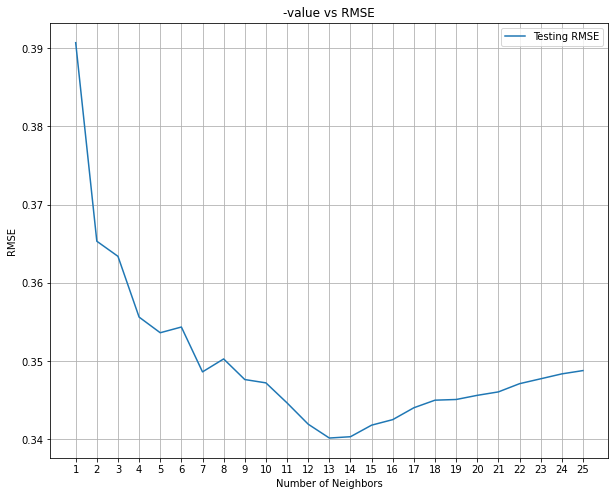


Nilai RMSE terbaik untuk Model KNN adalah 0.34 dengan nilai K = 13


In [190]:
neig = np.arange(1, 26, 1)
rmse_score_test = []

for i, k in enumerate(neig):
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train_rbst, y_train_rbst)
  prediksi_knn_test = knn.predict(X_test_rbst)
  rmse_score_test.append(np.sqrt(mean_squared_error(y_test_rbst, prediksi_knn_test)))

plt.figure(figsize=(10,8))
plt.plot(neig, rmse_score_test, label='Testing RMSE')
plt.legend()
plt.title('-value vs RMSE')
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.xticks(neig)
plt.grid()
plt.show()
print('\nNilai RMSE terbaik untuk Model KNN adalah {} dengan nilai K = {}'.format(round(np.min(rmse_score_test), 2), 1+rmse_score_test.index(np.min(rmse_score_test))))

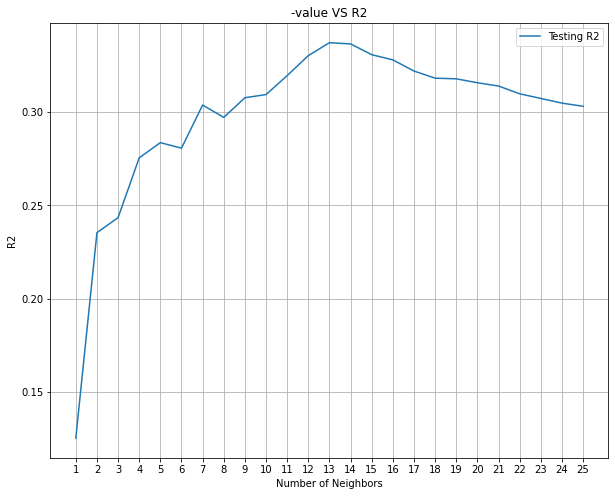


Nilai R2 terbaik untuk Model KNN adalah 0.34 dengan nilai K = 13


In [191]:
neig = np.arange(1, 26, 1)
scorer2 = []

for i, k in enumerate(neig):
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train_rbst, y_train_rbst)
  prediksi_knn_test = knn.predict(X_test_rbst)
  scorer2.append(r2_score(y_test_rbst, prediksi_knn_test))

plt.figure(figsize=[10,8])
plt.plot(neig, scorer2, label = 'Testing R2')
plt.legend()
plt.title('-value VS R2')
plt.xlabel('Number of Neighbors')
plt.ylabel('R2')
plt.xticks(neig)
plt.grid()
plt.show()
print("\nNilai R2 terbaik untuk Model KNN adalah {} dengan nilai K = {}".format(round(np.max(scorer2), 2), 1+scorer2.index(np.max(scorer2)))) 

**XGBoost Regressor**

In [192]:
from xgboost import XGBRegressor

In [193]:
rating = [0.3, 0.03, 0.003, 0.0003]
for i in rating:
  xgb = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.5, learning_rate=i, max_depth=4, alpha=10, n_estimators=1000)
  xgb.fit(X_train_rbst, y_train_rbst)
  prediksi_xgb = xgb.predict(X_train_rbst)
  prediksi_xgb_test = xgb.predict(X_test_rbst)
  r2 = r2_score(y_test_rbst, prediksi_xgb_test)
  print('r^2 score Using Robust Scaler is :', r2)
  print('Nilai RMSE XGBoost Regressor pada Testing Set dengan Learning Rate = {} adalah {}'.format(i, np.sqrt(mean_squared_error(y_test_rbst, prediksi_xgb_test))))
  print('============================================================================================================================================================')

r^2 score Using Robust Scaler is : 0.38204674800253735
Nilai RMSE XGBoost Regressor pada Testing Set dengan Learning Rate = 0.3 adalah 0.32841982820414467
r^2 score Using Robust Scaler is : 0.38654165744286195
Nilai RMSE XGBoost Regressor pada Testing Set dengan Learning Rate = 0.03 adalah 0.3272232072289928
r^2 score Using Robust Scaler is : 0.30239074506522656
Nilai RMSE XGBoost Regressor pada Testing Set dengan Learning Rate = 0.003 adalah 0.3489455588986279
r^2 score Using Robust Scaler is : -0.14021293361434117
Nilai RMSE XGBoost Regressor pada Testing Set dengan Learning Rate = 0.0003 adalah 0.4461126517765856


In [194]:
#Tuning objective nya
objektif = ['reg:squarederror', 'reg:logistic', 'reg:tweedie']
for i in objektif:
  xgb = XGBRegressor(objective=i, colsample_bytree=0.5, learning_rate=0.03, max_depth=4, alpha=10, n_estimators=1000)
  xgb.fit(X_train_rbst, y_train_rbst)
  prediksi_xgb = xgb.predict(X_train_rbst)
  prediksi_xgb_test = xgb.predict(X_test_rbst)
  r2 = r2_score(y_test_rbst, prediksi_xgb_test)
  print('r^2 score Using Robust Scaler is :', r2)
  print('Nilai RMSE XGBoost Regressor pada Testing Set dengan Objective = {}'.format(i), 'adalah', np.sqrt(mean_squared_error(prediksi_xgb_test, y_test_rbst)))
  print('================================================================================================================================================================)')

r^2 score Using Robust Scaler is : 0.38654165744286195
Nilai RMSE XGBoost Regressor pada Testing Set dengan Objective = reg:squarederror adalah 0.3272232072289928
================================================================================================================================================================)
r^2 score Using Robust Scaler is : 0.3880161762027444
Nilai RMSE XGBoost Regressor pada Testing Set dengan Objective = reg:logistic adalah 0.326829711039007
================================================================================================================================================================)
r^2 score Using Robust Scaler is : 0.3442887268701388
Nilai RMSE XGBoost Regressor pada Testing Set dengan Objective = reg:tweedie adalah 0.33830458491144555
================================================================================================================================================================)


**Random Forest Regressor**

In [195]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [196]:
rf = RandomForestRegressor()
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [197]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [198]:
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'bootstrap' : bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [199]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train_rbst, y_train_rbst)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 33.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [200]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [201]:
rf = RandomForestRegressor(n_estimators=400, bootstrap=False, max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2)
rf.fit(X_train_rbst, y_train_rbst)
prediksi_rf = rf.predict(X_train_rbst)
prediksi_rf_test = rf.predict(X_test_rbst)
r2 = r2_score(y_test_rbst, prediksi_rf_test)
print('r^2 score Using Robust Scaler is :', r2)
print('RMSE untuk model Random Forest dengan n_estimators 400 adalah :', np.sqrt(mean_squared_error(y_test_rbst, prediksi_rf_test)))

r^2 score Using Robust Scaler is : 0.4943404133928162
RMSE untuk model Random Forest dengan n_estimators 400 adalah : 0.2970849703230319
